In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./IDA_Statement_of_Credits_and_Grants__-_Latest_Available_Snapshot.csv")

# Initial data walkthrough

In [3]:
df.head()

,End of Period,Credit Number,Region,Country Code,Country,Borrower,Credit Status,Service Charge Rate,Currency of Commitment,Project ID,...,Repaid 3rd Party (US$),Due 3rd Party (US$),Credits Held (US$),First Repayment Date,Last Repayment Date,Agreement Signing Date,Board Approval Date,Effective Date (Most Recent),Closed Date (Most Recent),Last Disbursement Date
0,06/30/2023 12:00:00 AM,IDA00010,LATIN AMERICA AND CARIBBEAN,HN,Honduras,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P007335,...,0.0,0,0.0,09/01/1971 12:00:00 AM,03/01/2011 12:00:00 AM,05/12/1961 12:00:00 AM,05/11/1961 12:00:00 AM,06/29/1961 12:00:00 AM,07/31/1967 12:00:00 AM,NaN
1,06/30/2023 12:00:00 AM,IDA00020,EASTERN AND SOUTHERN AFRICA,SD,Sudan,Ministry of Finance & Economic Planning,Repaying,0.75,USD,P002553,...,0.0,0,0.0,07/15/1971 12:00:00 AM,01/15/2011 12:00:00 AM,06/14/1961 12:00:00 AM,06/13/1961 12:00:00 AM,10/19/1961 12:00:00 AM,12/31/1971 12:00:00 AM,NaN
2,06/30/2023 12:00:00 AM,IDA00030,SOUTH ASIA,IN,India,CONTROLLER OF AID ACCOUNTS & AUDIT,Fully Repaid,0.75,USD,P009610,...,0.0,0,0.0,08/15/1971 12:00:00 AM,02/15/2011 12:00:00 AM,06/21/1961 12:00:00 AM,06/20/1961 12:00:00 AM,08/25/1961 12:00:00 AM,06/30/1967 12:00:00 AM,NaN
3,06/30/2023 12:00:00 AM,IDA00040,LATIN AMERICA AND CARIBBEAN,CL,Chile,MINISTERIO DE OBRAS PUBLICAS,Fully Repaid,0.75,USD,P006585,...,0.0,0,0.0,12/01/1971 12:00:00 AM,06/01/2011 12:00:00 AM,06/28/1961 12:00:00 AM,06/27/1961 12:00:00 AM,12/21/1961 12:00:00 AM,12/31/1968 12:00:00 AM,NaN
4,06/30/2023 12:00:00 AM,IDA00050,LATIN AMERICA AND CARIBBEAN,CO,Colombia,MINISTERIO DE HACIENDA Y CREDITO PUBLICO,Fully Repaid,0.75,USD,P006701,...,0.0,0,0.0,12/01/1971 12:00:00 AM,06/01/2011 12:00:00 AM,08/28/1961 12:00:00 AM,08/15/1961 12:00:00 AM,11/25/1961 12:00:00 AM,12/31/1968 12:00:00 AM,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10225 entries, 0 to 10224
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   End of Period                    10225 non-null  object 
 1   Credit Number                    10225 non-null  object 
 2   Region                           10225 non-null  object 
 3   Country Code                     10225 non-null  object 
 4   Country                          10225 non-null  object 
 5   Borrower                         10225 non-null  object 
 6   Credit Status                    10225 non-null  object 
 7   Service Charge Rate              7939 non-null   float64
 8   Currency of Commitment           10225 non-null  object 
 9   Project ID                       10225 non-null  object 
 10  Project Name                     10224 non-null  object 
 11  Original Principal Amount (US$)  10225 non-null  float64
 12  Cancelled Amount (

**Useless data are removed**

In [3]:
df = df.drop(["Region", "Country Code", "Project ID", "Credit Number"], axis=1)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Service Charge Rate,7939.0,9.275853e-01,6.094530e-01,0.00,0.75,0.75,0.75,6.960000e+00
Original Principal Amount (US$),10225.0,5.196628e+07,8.104911e+07,0.00,10000000.00,24000000.00,60000000.00,1.200000e+09
Cancelled Amount (US$),10225.0,3.484787e+06,1.880698e+07,0.00,0.00,113.48,751010.88,1.200000e+09
Undisbursed Amount (US$),10225.0,1.038961e+07,4.220474e+07,-8.00,0.00,0.00,0.00,7.537507e+08
Disbursed Amount (US$),10225.0,3.788830e+07,6.372026e+07,0.00,5647169.84,16007018.34,43132263.00,1.096893e+09
Repaid to IDA (US$),10225.0,1.287958e+07,2.763225e+07,0.00,0.00,2481008.32,13000000.00,5.617663e+08
Due to IDA (US$),10225.0,1.873656e+07,5.013096e+07,-3.85,0.00,162000.00,14372911.28,1.026319e+09
Exchange Adjustment (US$),10225.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.000000e+00
Borrower's Obligation (US$),10225.0,1.873656e+07,5.013096e+07,-3.85,0.00,162000.00,14372911.28,1.026319e+09
Sold 3rd Party (US$),10225.0,1.036836e+04,2.784366e+05,0.00,0.00,0.00,0.00,1.750000e+07


**I removed the 0s**

In [4]:
df = df.drop(["Due 3rd Party (US$)", "Exchange Adjustment (US$)"], axis=1)

**How many times each country have gotten loan**

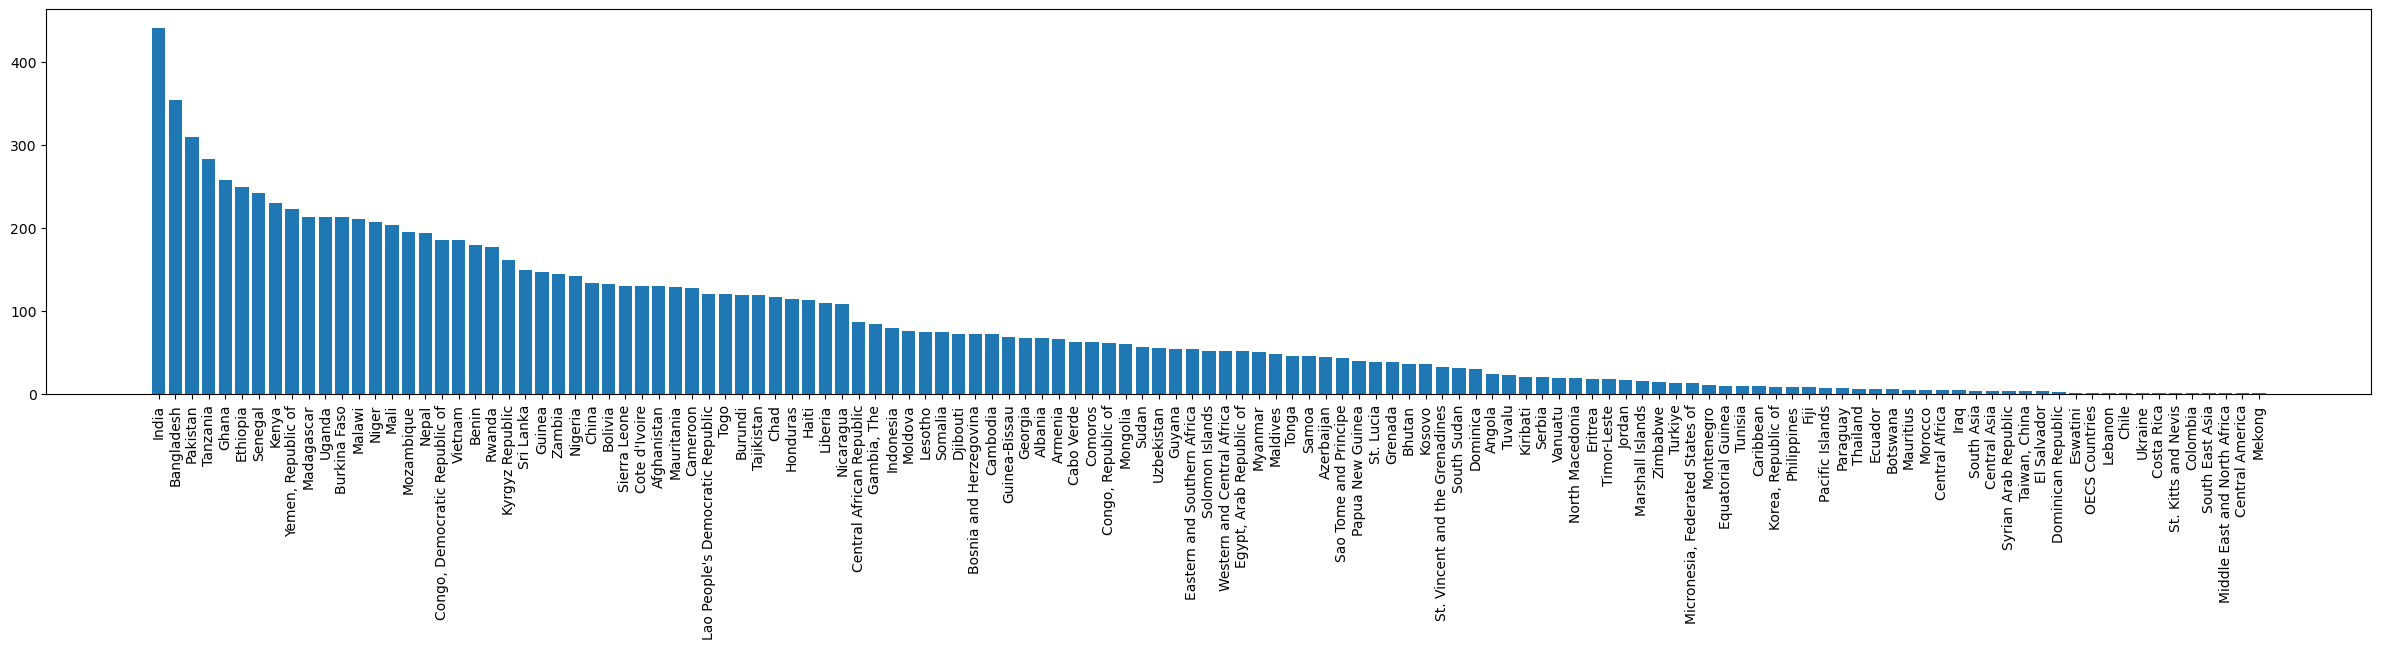

In [97]:
plt.figure(figsize=(30, 5))
plt.bar(df["Country"].value_counts().keys(), df["Country"].value_counts())
plt.xticks(rotation=90)
plt.savefig("Countries_frequency.jpeg")

**Which organizations appeared more than 300 times in our dataset**

In [98]:
df["Borrower"].value_counts()[df["Borrower"].value_counts()>100]

MINISTRY OF FINANCE                         1432
Ministry of Finance                         1055
MINISTERE DE L'ECONOMIE ET DES FINANCES      633
CONTROLLER OF AID ACCOUNTS & AUDIT           441
MINISTRY OF ECONOMIC AFFAIRS                 308
Ministere des Finances et du Budget          307
Ministry of Finance and Economic Affairs     296
Ministry of Finance and Planning             283
MINISTRY FOR FINANCE                         251
The National Treasury and Planning           223
Ministry of Finance & Economic Planning      221
Ministry of Finance, Planning & Eco. Dev     212
MINISTERE DE L'ECONOMIE ET FINANCES MALI     201
Ministry of Economy and Finance              193
Min of Economy Finance and Development       192
Ministre du Plan                             186
MINISTERE DES FINANCES                       186
Minister of Planning & Intl Co-operation     157
MINISTRY OF ECONOMY AND FINANCE              144
Ministry of Finance & National Planning      140
Fed Min of Fin, Budg

**Insight to credit statuses**

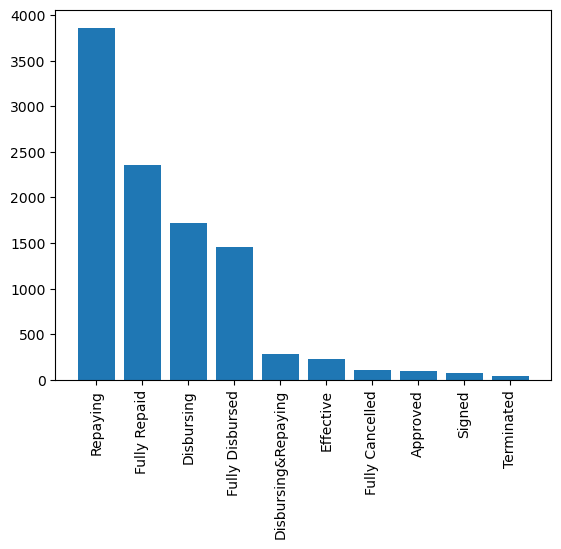

In [36]:
plt.bar(df["Credit Status"].value_counts().keys(), df["Credit Status"].value_counts())
plt.xticks(rotation=90)
plt.show()

In [26]:
df["Service Charge Rate"].describe()

count    7939.000000
mean        0.927585
std         0.609453
min         0.000000
25%         0.750000
50%         0.750000
75%         0.750000
max         6.960000
Name: Service Charge Rate, dtype: float64

**Most of the charg rates are 75 percent**

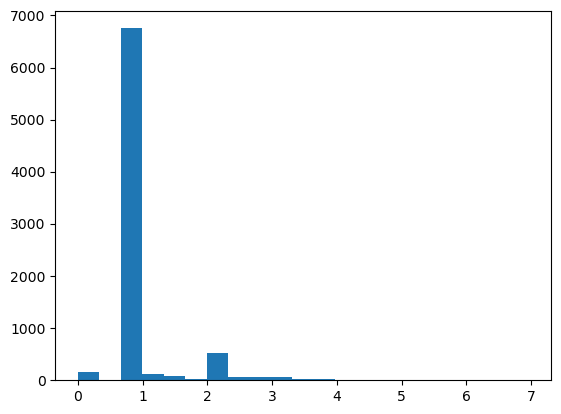

In [40]:
plt.hist(df["Service Charge Rate"], bins=21)
plt.show()

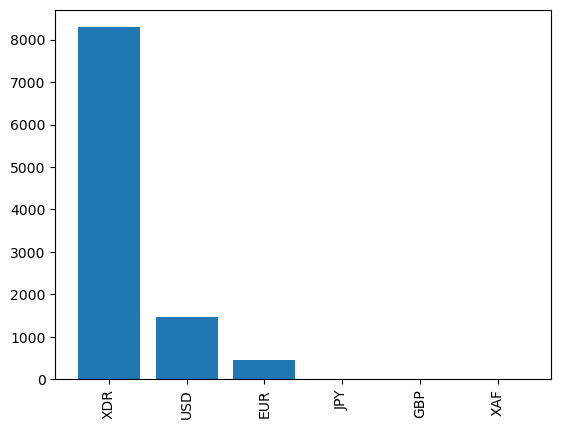

In [42]:
plt.bar(df["Currency of Commitment"].value_counts().keys(), df["Currency of Commitment"].value_counts())
plt.xticks(rotation=90)
plt.show()

**What is each countries repayment status**

In [89]:
credit_status_grouped_by_country = df.groupby("Country")["Credit Status"].value_counts()

print(credit_status_grouped_by_country)
# plt.figure(figsize=(50, 10))
# labels = [x[0]+" "+x[1] for x in credit_status_grouped_by_country.keys()]
# sns.countplot(df.groupby("Country")["Credit Status"].value_counts())
# plt.xticks(rotation=90, ticks=range(len(labels)), labels=labels)
# plt.show()
# print(df.groupby("Country")["Credit Status"].value_counts())

Country      Credit Status  
Afghanistan  Fully Disbursed    63
             Disbursing         29
             Fully Repaid       18
             Repaying            9
             Fully Cancelled     7
                                ..
Zambia       Fully Cancelled     1
             Terminated          1
Zimbabwe     Repaying           13
             Disbursing          1
             Fully Cancelled     1
Name: Credit Status, Length: 619, dtype: int64


**Correlation heatmap of important data**

<AxesSubplot:>

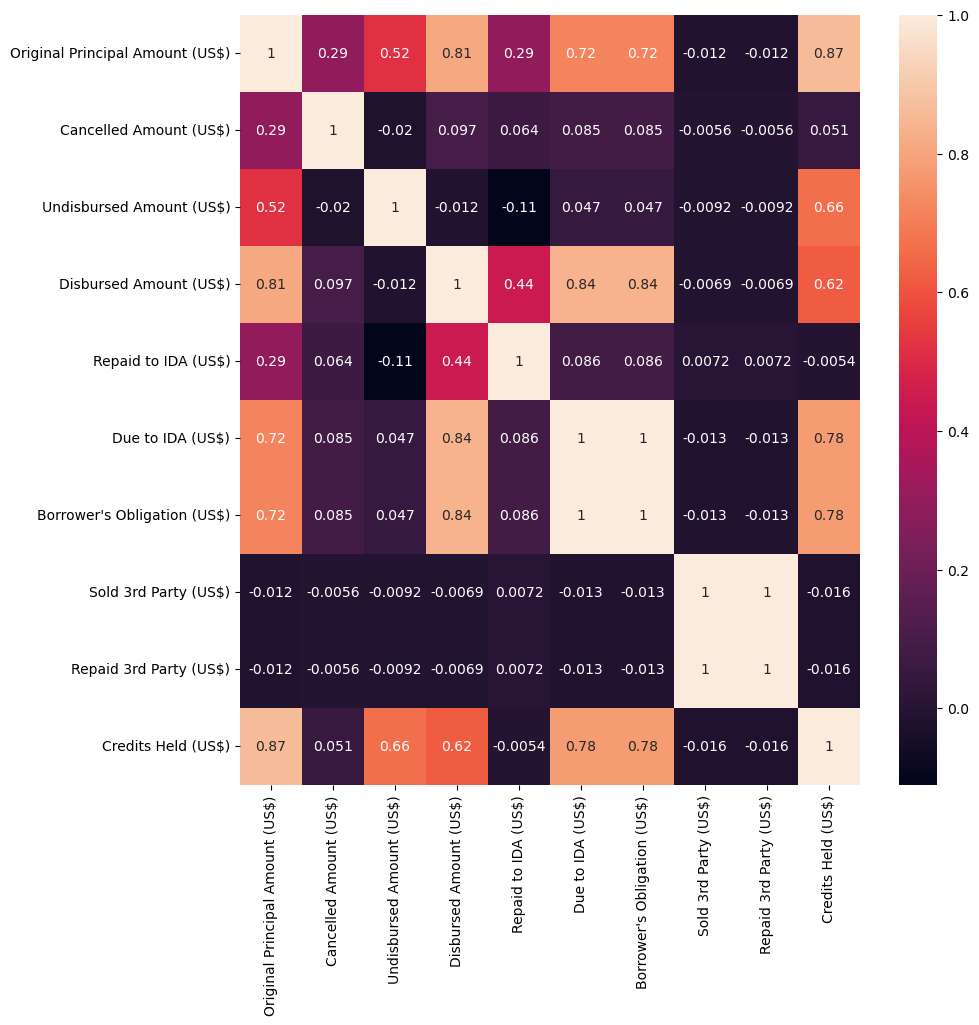

In [101]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['Original Principal Amount (US$)', 'Cancelled Amount (US$)',
       'Undisbursed Amount (US$)', 'Disbursed Amount (US$)',
       'Repaid to IDA (US$)', 'Due to IDA (US$)',
       'Borrower\'s Obligation (US$)', 'Sold 3rd Party (US$)',
       'Repaid 3rd Party (US$)', 'Credits Held (US$)']].corr(), annot= True)

**Dropping highly correlated (Duplicate data)**

In [5]:
df = df.drop(["Repaid 3rd Party (US$)", "Borrower\'s Obligation (US$)"], axis = 1)

In [107]:
financial_values = ['Original Principal Amount (US$)', 'Cancelled Amount (US$)',
       'Undisbursed Amount (US$)', 'Disbursed Amount (US$)',
       'Repaid to IDA (US$)', 'Due to IDA (US$)', 'Sold 3rd Party (US$)',
       'Credits Held (US$)']

**Distributions of financial states**

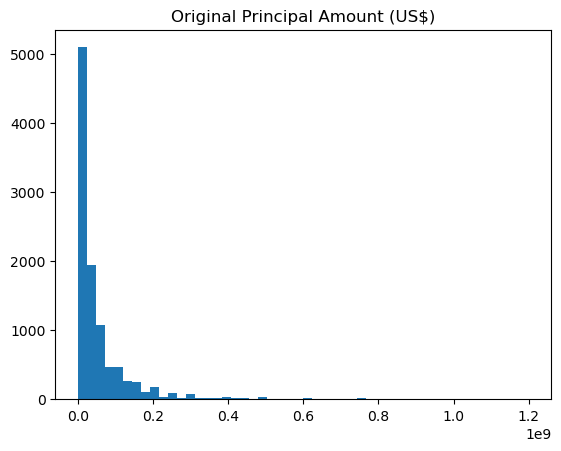

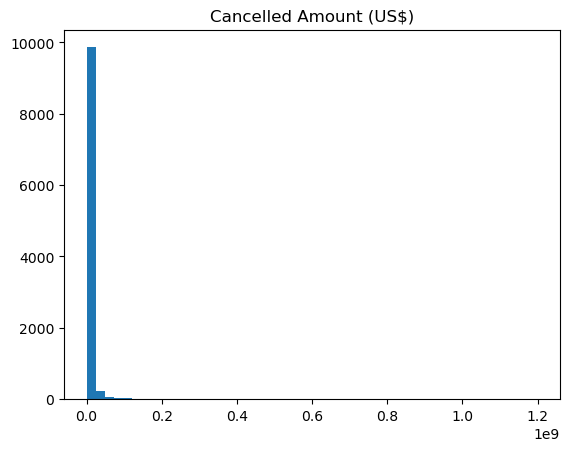

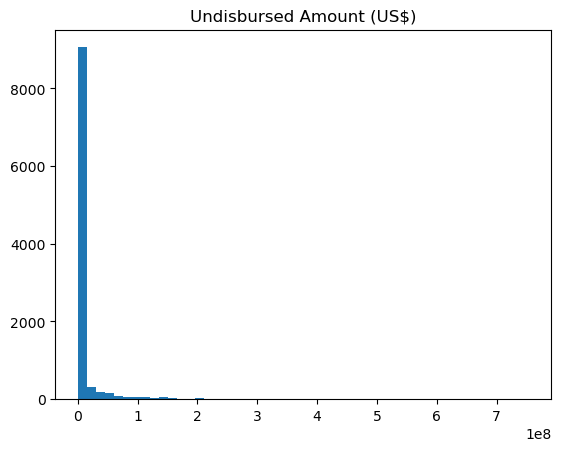

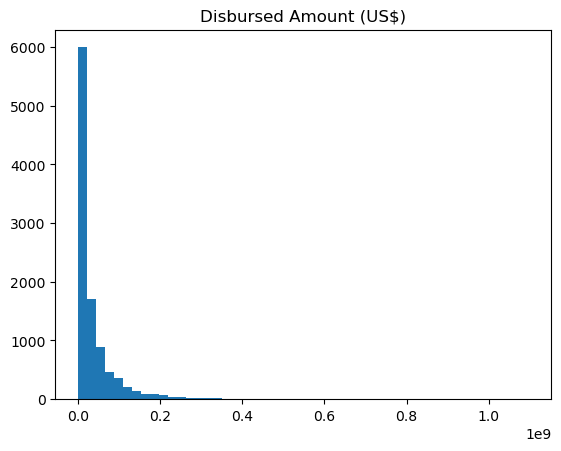

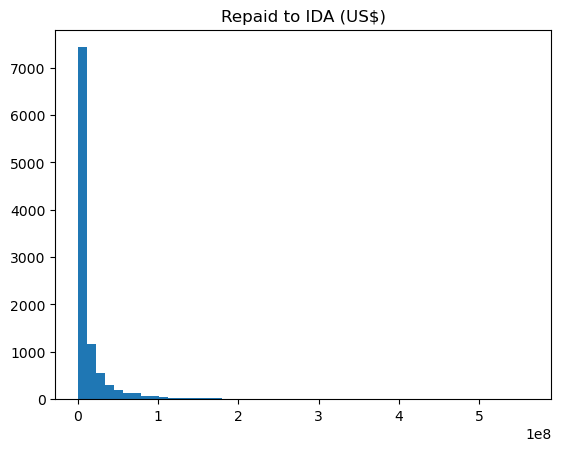

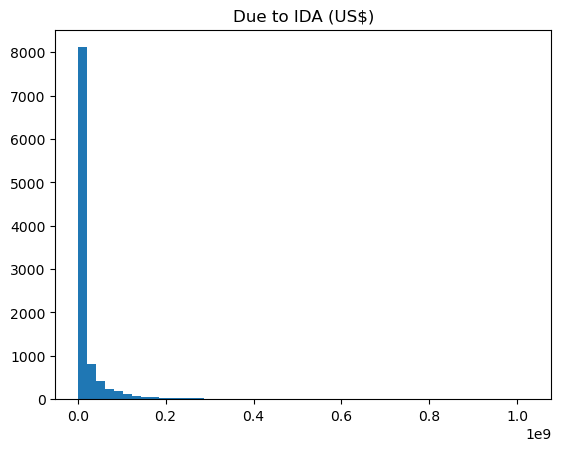

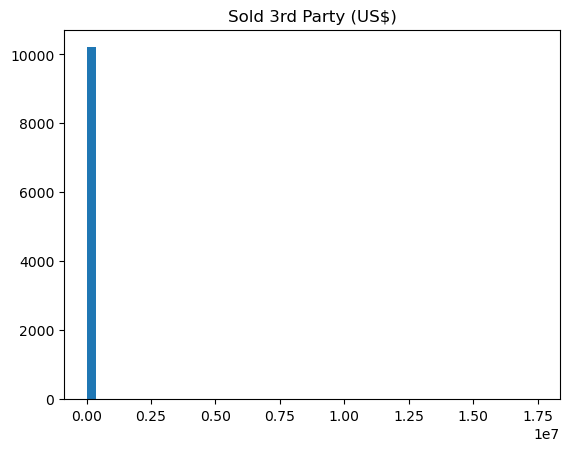

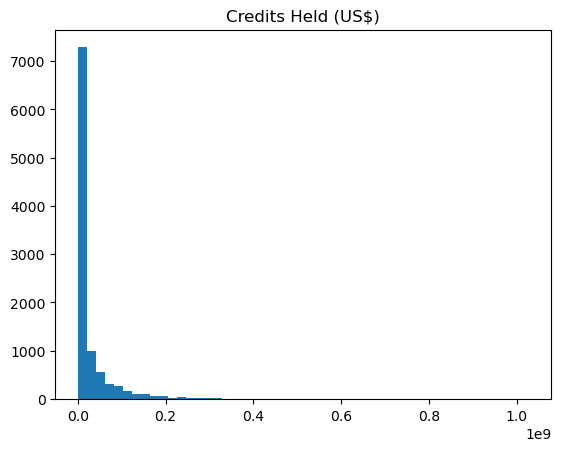

In [126]:
for i in financial_values:
    plt.title(i)
    plt.hist(df[i], bins=50)
    plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe84f60e280>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe84f626bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe84f60eb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe84f626430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe84f626730>],
 'means': []}

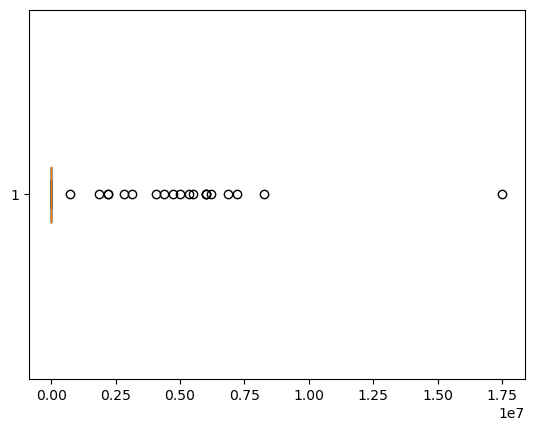

In [137]:
plt.boxplot(df["Sold 3rd Party (US$)"], vert=False)

In [6]:
df = df.drop(["Sold 3rd Party (US$)"], axis=1)

**As we see education and industry were the main reasons of countries for getting loan**

In [15]:
df["Project Name"].value_counts()[df["Project Name"].value_counts()>10]

EDUCATION II                                39
SAC                                         33
EDUCATION                                   31
TECHNICAL ASSISTANCE                        30
EDUCATION I                                 28
SWEDD                                       21
SAC I                                       21
HIGHWAYS III                                20
HIGHWAYS IV                                 19
EDUCATION III                               19
SAC II                                      19
HIGHWAYS II                                 14
LIVESTOCK                                   14
PRAPS II                                    14
FORESTRY                                    14
African Centers of Excellence East/South    13
WACA ResIP                                  13
SAL                                         13
LIVESTOCK II                                13
HISWA Project                               12
HISWACA - SOP 1                             12
TELECOMMUNICA

**Funny, central bank forces people to get more loan in exchange to low charge rate 🤔**

Text(0.5, 0, 'Service Charge Rate')

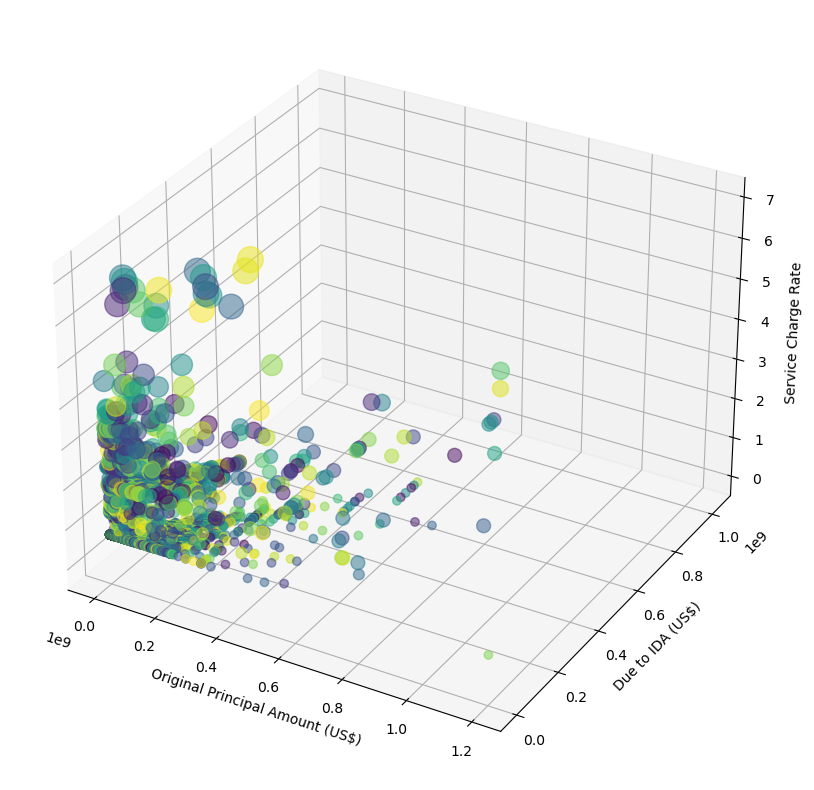

In [44]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df["Original Principal Amount (US$)"], df["Due to IDA (US$)"], df["Service Charge Rate"], c=np.random.rand(10225), s = df["Service Charge Rate"]*50, alpha = 0.5)
ax.set_xlabel("Original Principal Amount (US$)")
ax.set_ylabel("Due to IDA (US$)")
ax.set_zlabel("Service Charge Rate")

**Let us just extract only year for the rest of our analisis**

In [7]:
str_to_year = lambda x : [i.year for i in pd.to_datetime(x)]
str_to_month = lambda x : [i.month for i in pd.to_datetime(x)]

In [8]:
df["Agreement Signing Date year"] = str_to_year(df["Agreement Signing Date"])
df["Agreement Signing Date month"] = str_to_month(df["Agreement Signing Date"])
df = df.drop(["Agreement Signing Date"], axis=1)

In [9]:
df["Board Approval Date year"] = str_to_year(df["Board Approval Date"])
df["Board Approval Date month"] = str_to_month(df["Board Approval Date"])
df = df.drop(["Board Approval Date"], axis=1)

In [10]:
df["End of Period year"] = str_to_year(df["End of Period"])
df = df.drop(["End of Period"], axis=1)

In [11]:
df["First Repayment Date year"] = str_to_year(df["First Repayment Date"])
df = df.drop(["First Repayment Date"], axis=1)

In [12]:
df["Closed Date (Most Recent) year"] = str_to_year(df["Closed Date (Most Recent)"])
df = df.drop(["Closed Date (Most Recent)"], axis=1)

**It is obvious that the number of requests for loan would increase each year**

[]

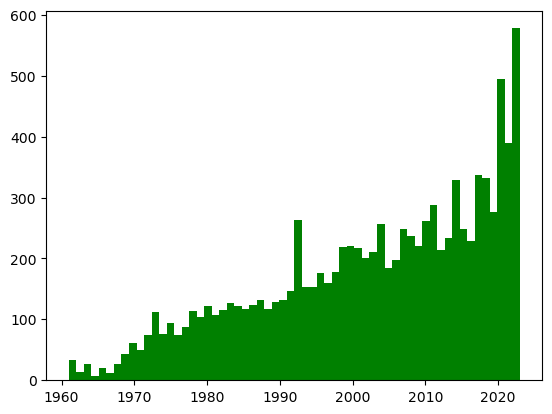

In [99]:
plt.hist(df["Board Approval Date year"], color="green", bins=60)
plt.plot()

[]

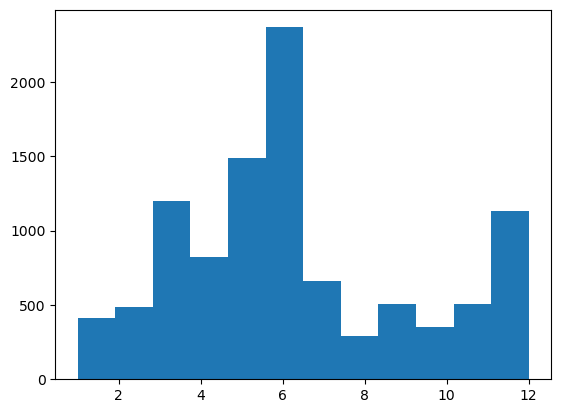

In [92]:
plt.hist(df["Board Approval Date month"], bins=12)
plt.plot()

**How long does it take between signing and approval**

In [119]:
pd.value_counts(-1 * np.array(df["Board Approval Date year"] - df["Agreement Signing Date year"]))

-0.0    8707
 1.0    1325
 2.0      40
 3.0       4
 4.0       3
-1.0       1
dtype: int64

**How long after getting the loan you can start paying it back?**

In [120]:
pd.value_counts(-1 * np.array(df["Board Approval Date year"] - df["First Repayment Date year"]))

 10.0    4863
 11.0    1272
 6.0      795
 5.0      709
 7.0      193
 9.0       98
 8.0       52
 2.0       18
 3.0       15
 4.0       14
 1.0        6
-0.0        3
 12.0       2
 14.0       1
 13.0       1
 17.0       1
 18.0       1
dtype: int64

**The give countries up to 60 year deadline for giving loan back**

[]

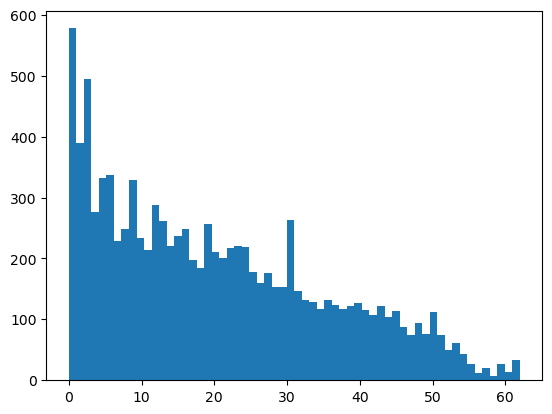

In [142]:
plt.hist((np.array(df["End of Period year"] - df["Board Approval Date year"])), bins=60)
plt.plot()

[]

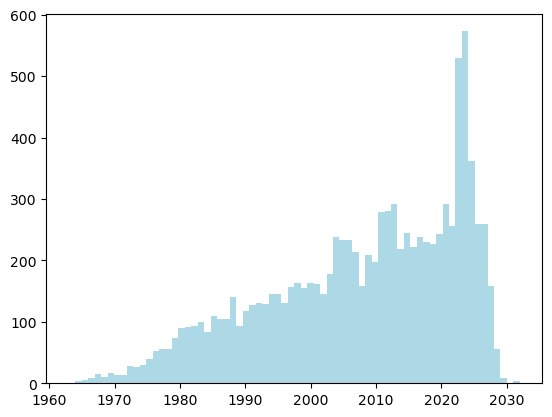

In [150]:
plt.hist(df["Closed Date (Most Recent) year"], bins=70, color="lightblue")
plt.plot()

**It took over 50 years after due date for some countries to pay their loan back**

[]

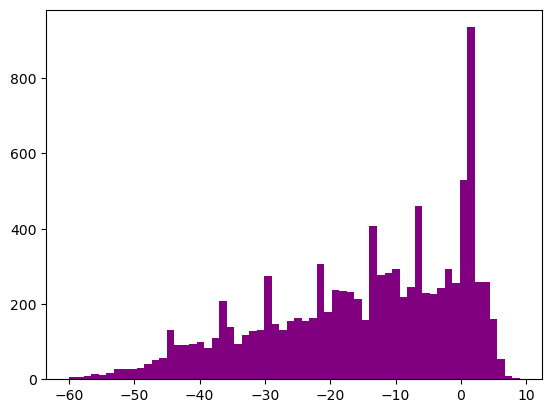

In [155]:
plt.hist((np.array(df["Closed Date (Most Recent) year"] - df["End of Period year"])), color="purple", bins=60)
plt.plot()

**Most of the countries pay their loans back in around 4 years**

In [14]:
(df["Closed Date (Most Recent) year"] - df["First Repayment Date year"]).mean()

-3.6362053959965186